# Berlin Airbnb Modelling

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pathlib import Path

from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [18]:
sns.set(style='whitegrid', palette='coolwarm')

Read in the processed data

In [19]:
DATA_PATH = Path("../data/processed/")
listings = pd.read_csv(DATA_PATH/"processed_listings.csv")
listings.reset_index()
listings.drop("id", axis=1, inplace=True)

Let's create a set of data without some of the listings with extreme prices

In [60]:
listings = listings[listings["price"] < 200]

Separate our data set into predictors and target variable 

In [61]:
X = listings.drop("price", axis=1)
y = listings["price"]

## Linear Regression

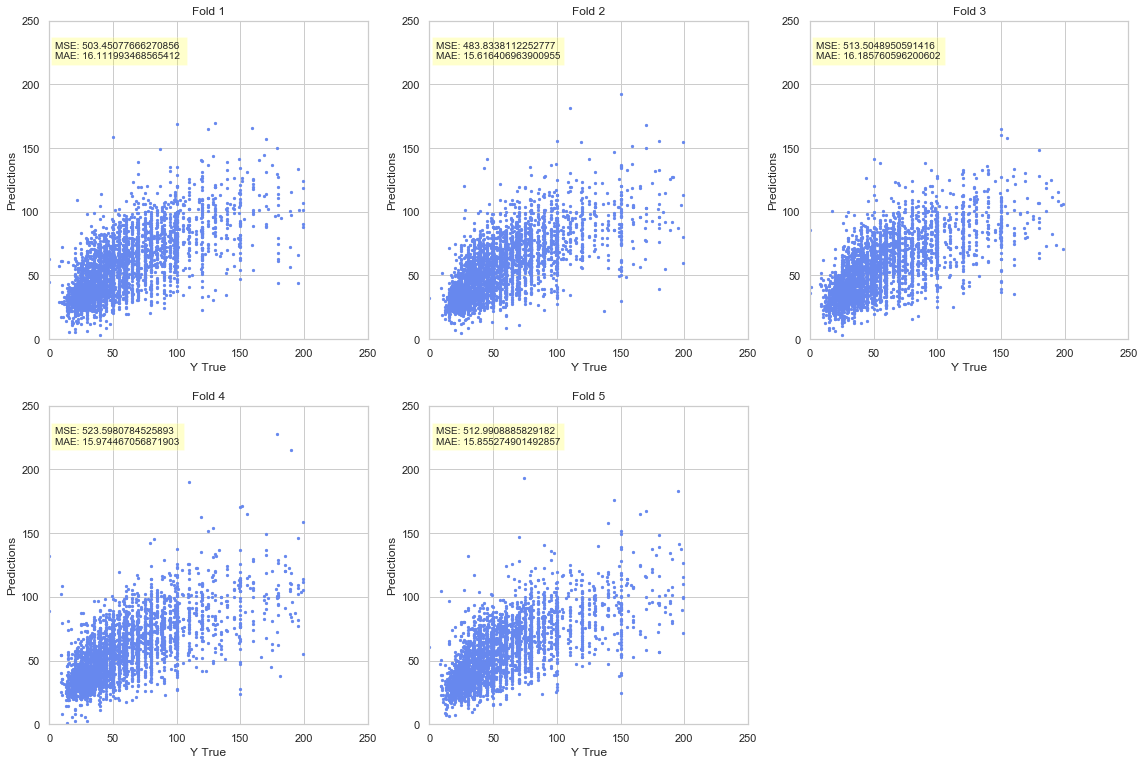

In [85]:
all_predictions = []
errors = []

# Instantiate the KFold class
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Loop through each fold in cross validation
for train_index, test_index in kf.split(X, y):
    # Create training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model and predict test values
    lm = LinearRegression().fit(X_train, y_train)
    predictions = lm.predict(X_test)
    
    # Store the true values and predictions
    all_predictions.append([y_test, predictions])
    # Store the mean squared error and mean absolute error of each fold
    errors.append((metrics.mean_squared_error(y_test, predictions),metrics.mean_absolute_error(y_test, predictions)))

plt.figure(figsize=(16,16))
for plot, data in enumerate(all_predictions):
    plt.subplot(331 + plot)
    plt.scatter(data[0],data[1],s=5)
    plt.xlim((0,250))
    plt.ylim((0,250))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("Y True")
    plt.ylabel("Predictions")
    plt.title("Fold " + str(plot+1))
    plt.text(
        5,220,
        f"MSE: {str(errors[plot][0])} \nMAE: {str(errors[plot][1])}",
        bbox=dict(facecolor='yellow', alpha=0.2))
    plt.tight_layout()

This looks to be a decent start at modelling the price. The mean absolute error is approximately £16 so with this model we can expect to be within £16 of the correct price. 

## Random Forest

Split our data into a training and testing set

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Build the random forest model

In [89]:
# Train the model
rfr = RandomForestRegressor(n_estimators=200).fit(X_train, y_train)

# Make predictions from the test set
predictions = rfr.predict(X_test)

# Evaluate the model
print(f"MSE: {metrics.mean_squared_error(y_test, predictions)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, predictions)}")

MSE: 460.97338115367177
MAE: 15.268855394378967


This doesn't seem to be a huge improvement over the linear regression model.

## Nearest Neighbours

In [91]:
# Train the model
knn = KNeighborsRegressor().fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Evaluate the model
print(f"MSE: {metrics.mean_squared_error(y_test, predictions)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, predictions)}")

MSE: 703.0384587488668
MAE: 18.983590208522212
